In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from scipy.stats import pearsonr

import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
# Generate random x and y data
n= 150
x = np.random.rand(n, 1)
y = x.squeeze() + np.random.randn(n) * 0.18  # Linear relation with noise

# Fit linear model
model = LinearRegression()
model.fit(x, y)

# Predict and calculate R2 score
y_pred = model.predict(x)
r2 = r2_score(y, y_pred)

# Calculate Pearson correlation
corr, _ = pearsonr(x.squeeze(), y)
mae = mean_absolute_error(y, y_pred)

print("Linear Regression Model Performance:")
print(f"R2 score: {r2:.3f}")
print(f"Pearson correlation: {corr:.3f}")
print(f"Pearson correlation square: {corr**2:.3f}")
print(f"Mean Absolute Error: {mae:.3f}")
print('')

r2_one = r2_score(y, np.mean(y) * np.ones_like(y))  # R2 for mean model
corr_one, _ = pearsonr(np.mean(y) * np.ones_like(y) + + np.random.randn(n) * 0.00001, y)  # Pearson for mean model
mae_one = mean_absolute_error(y, np.mean(y) * np.ones_like(y))
print("Mean Model Performance  (one number for all values):")
print(f"R2 score: {r2_one:.3f}")
print(f"Pearson correlation: {corr_one:.3f}")
print(f"Pearson correlation square: {corr_one**2:.3f}")
print(f"Mean Absolute Error: {mae_one:.3f}")
print('')


z = -x.squeeze() + 1
r2_reflected = r2_score(y, z)
corr_reflected, _ = pearsonr(z, y)
mae_reflected = mean_absolute_error(y, z)

print("Reflected x performance:")
print(f"R2 score: {r2_reflected:.3f}")
print(f"Pearson correlation: {corr_reflected:.3f}")
print(f"Pearson correlation square: {corr_reflected**2:.3f}")
print(f"Mean Absolute Error: {mae_reflected:.3f}")

Linear Regression Model Performance:
R2 score: 0.718
Pearson correlation: 0.847
Pearson correlation square: 0.718
Mean Absolute Error: 0.141

Mean Model Performance  (one number for all values):
R2 score: 0.000
Pearson correlation: 0.079
Pearson correlation square: 0.006
Mean Absolute Error: 0.277

Reflected x performance:
R2 score: -2.240
Pearson correlation: -0.847
Pearson correlation square: 0.718
Mean Absolute Error: 0.523


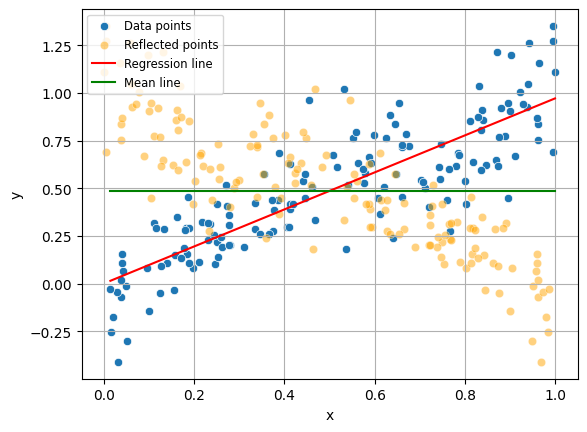

In [77]:
sns.scatterplot(x=x.squeeze(), y=y, label='Data points')
sns.scatterplot(x=z, y=y, label='Reflected points', color='orange', alpha=0.5)
sns.lineplot(x=x.squeeze(), y=y_pred, color='red', label='Regression line')
sns.lineplot(x=x.squeeze(), y=np.mean(y) * np.ones_like(y), color='green', label='Mean line')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper left', fontsize='small')